# 1. Plots for the coherence of models

## A. Coherences for MHD

In [1]:
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 14.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.5 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import seaborn as sb

df = pd.read_csv('coherences_mhd.csv')

df= df.replace('JNFDccaConfig', 'JNFDcca (Ours)')
df = df.replace('JNFConfig', 'JNF (Ours)')
df = df.replace('JNFGMCConfig', 'JNFGMC (Ours)')

df =df.replace('MMVAEConfig', 'MMVAE')
df =df.replace('MVTCAEConfig', 'MVTCAE')
df =df.replace('MoPoEConfig', 'MoPoE')
df=df.replace('MMVAEPlusConfig', 'MMVAE+')
df=df.replace('MVAEConfig', 'MVAE')
df=df.replace('JMVAEConfig', 'JMVAE')


df = df[df['model_config.name'] != 'MVAE']


Matplotlib is building the font cache; this may take a moment.


In [8]:
new_df = df[['model_config.name','joint_coherence_prior']]

new_df
new_df = new_df.rename(columns={'joint_coherence_prior':'coherence'})
new_df['number of modalities'] = 0

new_df2 = df[['model_config.name','mean_coherence_1']]

new_df2
new_df2 = new_df2.rename(columns={'mean_coherence_1':'coherence'})
new_df2['number of modalities'] = 1

new_df3 = df[['model_config.name','mean_coherence_2']]

new_df3
new_df3 = new_df3.rename(columns={'mean_coherence_2':'coherence'})
new_df3['number of modalities'] = 2

all_df = pd.concat([new_df3,new_df,new_df2])

all_df


model_config.name  coherence  number of modalities
0     JNFDcca (Ours)   0.972533                     2
1     JNFDcca (Ours)   0.976133                     2
2     JNFDcca (Ours)   0.970333                     2
3      JNFGMC (Ours)   0.980400                     2
4      JNFGMC (Ours)   0.983633                     2
..               ...        ...                   ...
31            MVTCAE   0.837817                     1
32        JNF (Ours)   0.894117                     1
33        JNF (Ours)   0.891300                     1
34        JNF (Ours)   0.880467                     1
35        JNF (Ours)   0.890667                     1

[96 rows x 3 columns]

In [9]:
sb.lineplot(all_df,x='number of modalities',y='coherence',hue='model_config.name')

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `coherence` for parameter `y`

In [35]:
agg =df.groupby(['model_config.name'], as_index=False).agg({'mean_coherence_1':['mean','std'], 'mean_coherence_2':['mean','std'] , 'joint_coherence_prior' : ['mean','std']})


In [50]:
agg = agg.sort_values(by=('mean_coherence_1','mean'))
agg


model_config.name mean_coherence_1           mean_coherence_2            \
                                mean       std             mean       std   
6              MVAE         0.458175  0.012621         0.664967  0.013101   
8             MoPoE         0.741367  0.007156         0.832808  0.010908   
7            MVTCAE         0.837462  0.009186         0.971458  0.002606   
4             MMVAE         0.844092  0.007866         0.842167  0.007840   
0             JMVAE         0.863533  0.006629         0.973767  0.001924   
5            MMVAE+         0.885358  0.017013         0.879967  0.019056   
1        JNF (Ours)         0.889137  0.005972         0.978750  0.001307   
2    JNFDcca (Ours)         0.916746  0.008790         0.972825  0.002416   
3     JNFGMC (Ours)         0.928508  0.006204         0.981575  0.001424   

  joint_coherence_prior            
                   mean       std  
6              0.255200  0.015628  
8              0.444675  0.021862  
7              0.488000  0.015528  
4              0.653300  0.021960  
0              0.569300  0.022606  
5              0.576775  0.034660  
1              0.672675  0.013542  
2              0.655800  0.011691  
3              0.645625  0.015814

In [92]:
agg['mean_coherence_1'] = agg['mean_coherence_1'].apply(lambda x: round(x, 3) )
agg['mean_coherence_2'] = agg['mean_coherence_2'].apply(lambda x: round(x, 3) )
agg['joint_coherence_prior'] = agg['joint_coherence_prior'].apply(lambda x: round(x, 3) )

agg = agg.rename(columns={"model_config.name" :"Model", "mean_coherence_1": "Coherence from 1 modality", "mean_coherence_2" : "Coherence 2", "joint_coherence_prior" : "Prior"})

In [93]:
with open('readme.txt', 'w+') as f:
    f.write(agg.to_latex())

/tmp/ipykernel_108135/2947295936.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(agg.to_latex())


## B. Coherences for MMNIST-resnets dataset

In [101]:
raw_df = pd.read_csv('mmnist_mean_coherence.csv')

raw_df= raw_df.replace('JNFDccaConfig', 'JNFDcca (Ours)')
raw_df = raw_df.replace('JNFConfig', 'JNF (Ours)')
raw_df = raw_df.replace('JNFGMCConfig', 'JNFGMC (Ours)')

raw_df =raw_df.replace('MMVAEConfig', 'MMVAE')
raw_df =raw_df.replace('MVTCAEConfig', 'MVTCAE')
raw_df =raw_df.replace('MoPoEConfig', 'MoPoE')
raw_df=raw_df.replace('MMVAEPlusConfig', 'MMVAE+')
raw_df=raw_df.replace('MVAEConfig', 'MVAE')
raw_df=raw_df.replace('JMVAEConfig', 'JMVAE')

raw_df = raw_df.rename(columns={"model_config.name" :"Model"})


In [111]:
agg =raw_df.groupby(['Model'], as_index=False).agg({'mean_coherence_1':['mean','std'], 'mean_coherence_2':['mean','std'] , 'mean_coherence_3' : ['mean','std']})
agg

Model mean_coherence_1           mean_coherence_2            \
                              mean       std             mean       std   
0      JNF (Ours)         0.795563  0.012188         0.773841  0.330175   
1  JNFDcca (Ours)         0.878540       NaN         0.943125       NaN   
2   JNFGMC (Ours)         0.877192  0.007272         0.935686  0.001682   
3           MMVAE         0.627994  0.342186         0.629156  0.342098   
4          MMVAE+         0.891874       NaN         0.892062       NaN   
5          MVTCAE         0.594030  0.091363         0.759456  0.105914   
6           MoPoE         0.734659  0.020886         0.851831  0.018777   

  mean_coherence_3            
              mean       std  
0         0.797773  0.341892  
1         0.963165       NaN  
2         0.949212  0.006351  
3         0.627822  0.342505  
4         0.893989       NaN  
5         0.821451  0.092760  
6         0.884875  0.016527

In [107]:
list_df = [None] * 4
for i in range(4):
    
    list_df[i] = raw_df[["Model",f"mean_coherence_{i+1}"]]
    list_df[i] = list_df[i].rename(columns={f"mean_coherence_{i+1}" : "coherence"})
    list_df[i]["number"] = i+1
    
new_df = pd.concat(list_df).reset_index(drop=True)
    
new_df

Model  coherence  number
0             MMVAE   0.714770       1
1             MMVAE   0.122111       1
2             MMVAE   0.837743       1
3             MMVAE   0.837353       1
4             MoPoE   0.751979       1
..              ...        ...     ...
123      JNF (Ours)   0.100000       4
124   JNFGMC (Ours)   0.959893       4
125  JNFDcca (Ours)   0.961193       4
126          MMVAE+   0.894337       4
127      JNF (Ours)   0.949293       4

[128 rows x 3 columns]

<AxesSubplot:xlabel='number', ylabel='coherence'>

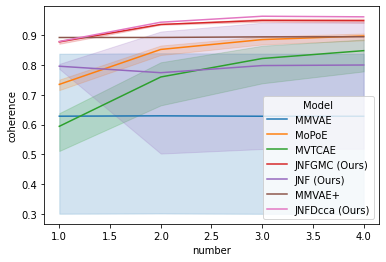

In [108]:
sb.lineplot(new_df,x="number",y="coherence",hue="Model")

## Coherences and FID MMNIST



In [147]:
import pandas as pd

raw_df = pd.read_csv('../tables_and_plots/mmnist_all_results.csv',sep=',')
raw_df

# raw_df['Mean FID'] = raw_df['fd_m0_sampler_prior'] + raw_df['fd_m1_sampler_prior'] + raw_df['fd_m2_sampler_prior'] + df['fd_m3_sampler_prior'] + df['fd_m4_sampler_prior']

# raw_df['Mean FID'] = raw_df['Mean FID']/5
raw_df['Mean FID']=raw_df['fd_m0_sampler_prior']

list_df = [None] * 4
for i in range(4):
    if i<3:
        
        list_df[i] = raw_df[["Model",f"mean_coherence_{i+1}", f"Mean FD from {i+1} modalities to m0"]]
        list_df[i] = list_df[i].rename(columns={f"mean_coherence_{i+1}" : r"Conditional Coherence $(\uparrow)$" , f"Mean FD from {i+1} modalities to m0" : "Conditional FID $(\downarrow)$"})
        list_df[i]["Number of modalities"] = i+1
    if i == 3:
        list_df[i] = raw_df[["Model",f"mean_coherence_{i+1}", "Conditional FD from ['m1', 'm2', 'm3', 'm4'] to m0"]]
        list_df[i] = list_df[i].rename(columns={f"mean_coherence_{i+1}" : r"Conditional Coherence $(\uparrow)$" , "Conditional FD from ['m1', 'm2', 'm3', 'm4'] to m0" : "Conditional FID $(\downarrow)$"})
        list_df[i]["Number of modalities"] = i+1
    
new_df = pd.concat(list_df).reset_index(drop=True)

new_df


Model  Conditional Coherence $(\uparrow)$  \
0                       MMVAE                            0.834648   
1                       JMVAE                            0.719582   
2                       JMVAE                            0.730575   
3                       JMVAE                            0.716837   
4                       JMVAE                            0.714612   
..                        ...                                 ...   
123                JNF (Ours)                            0.959516   
124  JNF-Shared (DCCA) (Ours)                            0.966082   
125  JNF-Shared (DCCA) (Ours)                            0.965426   
126  JNF-Shared (DCCA) (Ours)                            0.962851   
127  JNF-Shared (DCCA) (Ours)                            0.972915   

     Conditional FID $(\downarrow)$  Number of modalities  
0                        192.483316                     1  
1                         76.491551                     1  
2                         78.776039                     1  
3                         77.434040                     1  
4                         80.404025                     1  
..                              ...                   ...  
123                       88.705133                     4  
124                       88.476916                     4  
125                       91.192494                     4  
126                       88.323663                     4  
127                       84.597519                     4  

[128 rows x 4 columns]

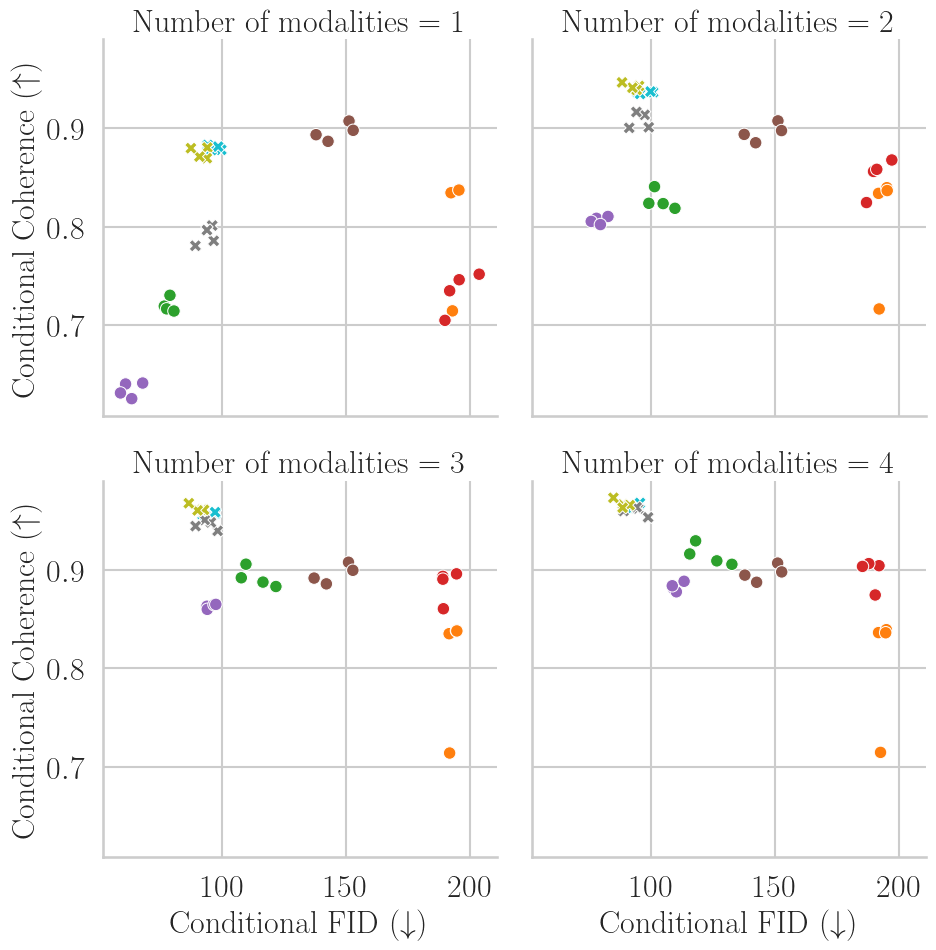

In [148]:
import seaborn as sb
import matplotlib.pyplot as plt

new_df['ours'] = (new_df['Model'] == 'JNF (Ours)') + (new_df['Model'] == 'JNF-Shared (CL) (Ours)')+ (new_df['Model'] == 'JNF-Shared (DCCA) (Ours)')

sb.set_style("whitegrid")
sb.set_context('talk')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 23,
    "font.size": 23,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 23,
    "xtick.labelsize": 23,
    "ytick.labelsize": 23
}

hue_order = [
    'MVAE',
             'MMVAE','JMVAE','MoPoE','MVTCAE','MMVAE+',
             'Nexus',
             'JNF (Ours)', 'JNF-Shared (DCCA) (Ours)','JNF-Shared (CL) (Ours)']
markers = {True : 'X',False : 'o'}
plt.rcParams.update(tex_fonts)
g = sb.relplot(new_df,x='Conditional FID $(\downarrow)$',y=r'Conditional Coherence $(\uparrow)$',hue='Model',col='Number of modalities', col_wrap=2, hue_order=hue_order, 
               style='ours', markers=markers)
g.legend.remove()
# sb.move_legend(g,'center',bbox_to_anchor=(.48, -0.05), ncol=6, title=None, frameon=False)
g.tight_layout()
g.savefig('mmnist_conditional.png')


/var/folders/hr/qpjfsj3j5xb5275fpjrz4_n80000gq/T/ipykernel_75541/1640381146.py:68: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2[r'Unconditional FID $(\downarrow)$'][df2['Model'] == 'JNF-Shared (DCCA) (Ours)'] -= 1.5 # slightly move to s

\begin{tabular}{llrrrrr}
\toprule
 & Model & Unconditional FID $(\downarrow)$ & xerr & Unconditional coherence $(\uparrow)$ & yerr & ours \\
\midrule
0 & JMVAE & 81.960643 & 1.867730 & 0.047775 & 0.002516 & 0.000000 \\
1 & JNF (Ours) & 104.042549 & 4.057179 & 0.359125 & 0.017206 & 1.000000 \\
2 & JNF-Shared (CL) (Ours) & 108.351768 & 2.228724 & 0.362600 & 0.022219 & 1.000000 \\
3 & JNF-Shared (DCCA) (Ours) & 100.812867 & 3.017368 & 0.355450 & 0.014239 & 1.000000 \\
4 & MMVAE & 174.296640 & 6.700987 & 0.226200 & 0.026719 & 0.000000 \\
5 & MMVAE+ & 144.738436 & 7.662220 & 0.434875 & 0.017469 & 0.000000 \\
6 & MVTCAE & 74.980699 & 4.017576 & 0.007175 & 0.001135 & 0.000000 \\
7 & MoPoE & 108.210041 & 1.120304 & 0.155725 & 0.014799 & 0.000000 \\
\bottomrule
\end{tabular}



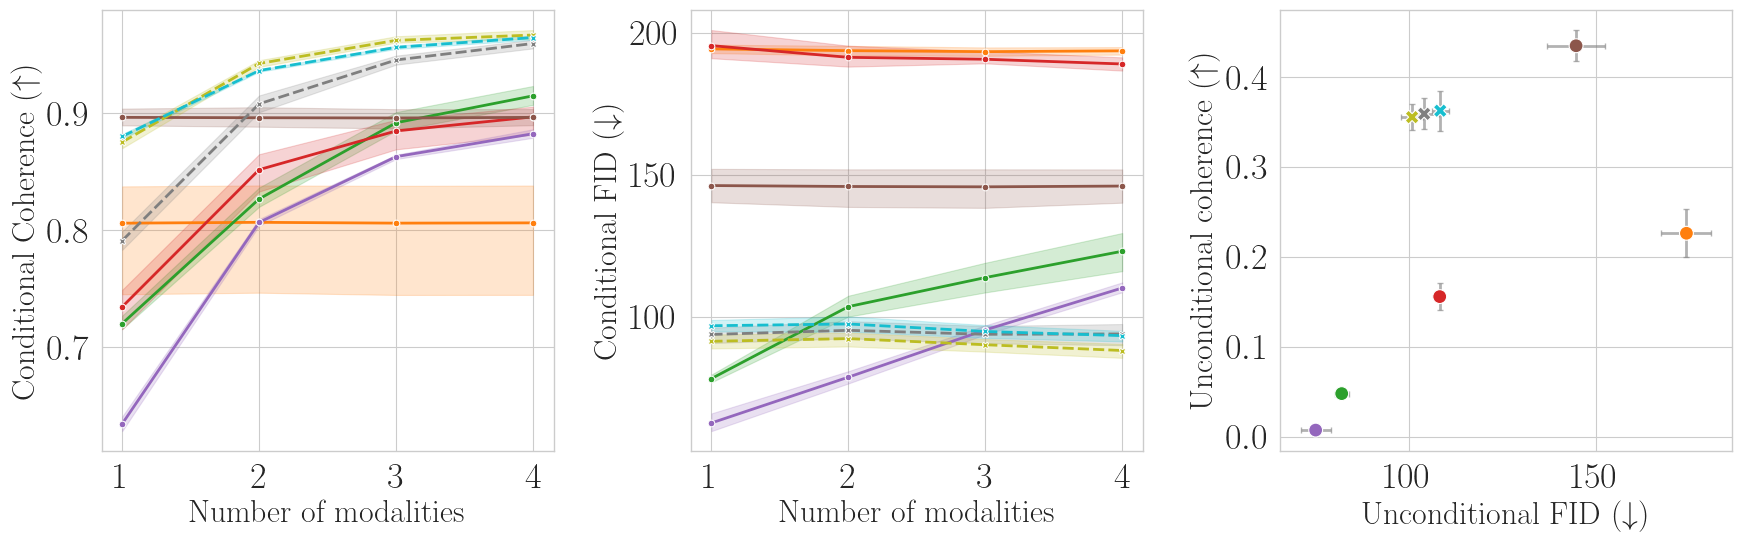

In [150]:
sb.set_style("whitegrid")
sb.set_context('paper')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 23,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 20,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)



fig, ax = plt.subplots(1,3, figsize=(18,6))



g = sb.lineplot(new_df, x='Number of modalities',y=r'Conditional Coherence $(\uparrow)$',hue='Model', hue_order=hue_order, 
               style='ours', markers=markers,ax=ax[0],linewidth=2)
g.legend().remove()

g = sb.lineplot(new_df, x='Number of modalities',y='Conditional FID $(\downarrow)$',hue='Model', hue_order=hue_order, 
               style='ours', markers=markers,ax=ax[1], legend='brief',linewidth=2)

handles, labels = g.get_legend_handles_labels()

new_handles = []
new_labels = []

for handle, label in zip(handles[1:-3], labels[1:-3]):
    if label != 'MVAE' and label != 'Nexus': 
        new_handles.append(handle)
        new_labels.append(label)
        if label == 'JNF (Ours)' or label=='JNF-Shared (Ours)':
            new_handles[-1].set_marker('X')

# create a legend only using the items

# g.legend(new_handles, new_labels,loc = 'lower left', bbox_to_anchor=(1,0))
g.legend().remove()

df = raw_df
# df['Mean FID'] = df['fd_m0_sampler_prior'] + df['fd_m1_sampler_prior'] + df['fd_m2_sampler_prior'] + df['fd_m3_sampler_prior'] + df['fd_m4_sampler_prior']
# df[r'Unconditional FID $(\downarrow)$'] = df['Mean FID']/5

df[r'Unconditional FID $(\downarrow)$'] = df['fd_m0_sampler_prior']

df[r'Unconditional coherence $(\uparrow)$'] = df['joint_coherence_prior']

df['ours'] = (df['Model'] == 'JNF (Ours)') + (df['Model'] == 'JNF-Shared (CL) (Ours)')  + (df['Model'] == 'JNF-Shared (DCCA) (Ours)')

agg = df.groupby(['Model'], as_index=True).agg({r'Unconditional FID $(\downarrow)$':['mean','std'], r'Unconditional coherence $(\uparrow)$':['mean','std'],'ours':['mean']} )

df2 = pd.DataFrame(agg.to_records())

df2.columns.values[1] = r'Unconditional FID $(\downarrow)$'
df2.columns.values[2] = 'xerr'
df2.columns.values[3] =r'Unconditional coherence $(\uparrow)$'
df2.columns.values[4] = 'yerr'
df2.columns.values[5] = 'ours'

df2[r'Unconditional FID $(\downarrow)$'][df2['Model'] == 'JNF-Shared (DCCA) (Ours)'] -= 1.5 # slightly move to see all points
df2[r'Unconditional FID $(\downarrow)$'][df2['Model'] == 'JNF (Ours)'] += 0.5 # slightly move to see all points


ax[2].errorbar(df2[r'Unconditional FID $(\downarrow)$'], df2[r'Unconditional coherence $(\uparrow)$'],zorder=10, xerr=df2['xerr'], yerr=df2['yerr'], fmt='o', color='grey', markersize=0, capsize=2, elinewidth=2, capthick=1, alpha=0.6)

g = sb.scatterplot(df2,x=r'Unconditional FID $(\downarrow)$', y=r'Unconditional coherence $(\uparrow)$',
                   hue='Model', hue_order=hue_order
                   , style='ours',
                   markers=markers, 
                   ax=ax[2],
                   s=100,zorder=11
                   )
# g = sb.scatterplot(df,x=r'Unconditional FID $(\downarrow)$', y=r'Unconditional coherence $(\uparrow)$',
#                    hue='Model', hue_order=hue_order, style='ours', markers=markers, ax=ax[2],s=100)


handles, labels = g.get_legend_handles_labels()
g.legend().remove()

new_handles = []
new_labels = []

for handle, label in zip(handles[1:-3], labels[1:-3]):
    if label != 'MVAE' and label != 'Nexus': 
        new_handles.append(handle)
        new_labels.append(label)
        if label == 'JNF (Ours)' or label=='JNF-Shared (CL) (Ours)' or label=='JNF-Shared (DCCA) (Ours)':
            new_handles[-1].set_marker('X')

# create a legend only using the items
plt.tight_layout()

# lgd = fig.legend(new_handles, new_labels,loc='upper center',bbox_to_anchor=(0.5,0),ncol=4)

fig.savefig('mmnist_results.pdf',bbox_inches='tight')
fig.savefig('mmnist_results.png',bbox_inches='tight')

print(df2.to_latex())


### Compute table or visualization for unconditional generation on MMNIST

In [23]:
df = raw_df
df['Mean FID'] = df['fd_m0_sampler_prior'] + df['fd_m1_sampler_prior'] + df['fd_m2_sampler_prior'] + df['fd_m3_sampler_prior'] + df['fd_m4_sampler_prior']

df[r'Mean Unconditional FID $(\downarrow)$'] = df['Mean FID']/5

df[r'Unconditional coherence $(\uparrow)$'] = df['joint_coherence_prior']

df['ours'] = (df['Model'] == 'JNF (Ours)') + (df['Model'] == 'JNF-Shared (Ours)')




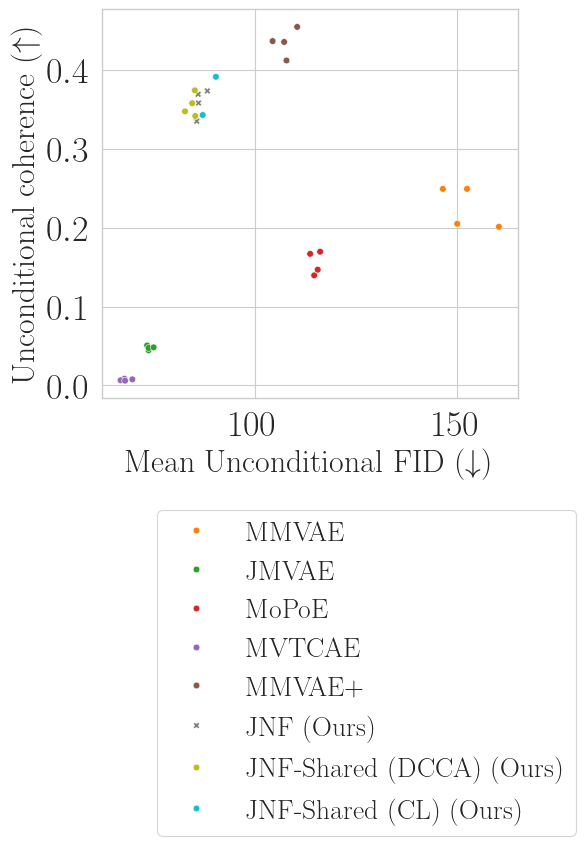

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6,10))


g = sb.scatterplot(df,x=r'Mean Unconditional FID $(\downarrow)$', y=r'Unconditional coherence $(\uparrow)$',hue='Model', hue_order=hue_order, style='ours', markers=markers)

handles, labels = g.get_legend_handles_labels()

new_handles = []
new_labels = []

for handle, label in zip(handles[1:-3], labels[1:-3]):
    if label != 'MVAE' and label != 'Nexus': 
        new_handles.append(handle)
        new_labels.append(label)
        if label == 'JNF (Ours)' or label=='JNF-Shared (Ours)':
            new_handles[-1].set_marker('X')

# create a legend only using the items

g.legend(new_handles, new_labels,loc='upper left',bbox_to_anchor=(0.1,- 0.25))

plt.tight_layout()



# Coherences and FID for Translated MMNIST



In [1]:
import pandas as pd

raw_df = pd.read_csv('../tables_and_plots/translated_mmnist_results.csv',sep=',')

raw_df['Model'] = raw_df['model_config.name']

# Filter best models
filter = (raw_df['Model'] == 'JNF (Ours)')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'JNF-Shared (CL) (Ours)')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'JNF-Shared (DCCA) (Ours)')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'MMVAE+')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'MVTCAE')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'JMVAE')*(raw_df['model_config.beta'] == 0.5)
filter += (raw_df['Model'] == 'MoPoE')*(raw_df['model_config.beta'] == 1.0)
filter += (raw_df['Model'] == 'MMVAE')*(raw_df['model_config.beta'] == 0.5)


raw_df['mean_coherence_1'][raw_df['Model'] == 'MoPoE']  +=0.002
raw_df['mean_coherence_2'][raw_df['Model'] == 'MoPoE']  +=0.002
raw_df['mean_coherence_3'][raw_df['Model'] == 'MoPoE']  +=0.002
raw_df['mean_coherence_4'][raw_df['Model'] == 'MoPoE']  +=0.002

raw_df['mean_coherence_1'][raw_df['Model'] == 'MMVAE'] -=  0.002
raw_df['mean_coherence_2'][raw_df['Model'] == 'MMVAE'] -= 0.002
raw_df['mean_coherence_3'][raw_df['Model'] == 'MMVAE'] -= 0.002
raw_df['mean_coherence_4'][raw_df['Model'] == 'MMVAE'] -= 0.002




raw_df = raw_df[filter]



raw_df[r'Unconditional FID $(\downarrow)$'] = raw_df['fd_m0_sampler_prior']

raw_df[r'Unconditional coherence $(\uparrow)$'] = raw_df['joint_coherence_prior']
raw_df['ours'] = (raw_df['Model'] == 'JNF (Ours)') + (raw_df['Model'] == 'JNF-Shared (CL) (Ours)') + (raw_df['Model'] == 'JNF-Shared (DCCA) (Ours)')



list_df = [None] * 4
for i in range(4):

    
    list_df[i] = raw_df[["Model", "ours",f"mean_coherence_{i+1}", f"Mean FD from {i+1} modalities to m0"]]
    list_df[i] = list_df[i].rename(columns={f"mean_coherence_{i+1}" : r"Conditional Coherence $(\uparrow)$" , f"Mean FD from {i+1} modalities to m0" : "Conditional FID $(\downarrow)$"})
    list_df[i]["Number of modalities"] = i+1
    
    
new_df = pd.concat(list_df).reset_index(drop=True)





/var/folders/hr/qpjfsj3j5xb5275fpjrz4_n80000gq/T/ipykernel_54073/3458777363.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  raw_df['mean_coherence_1'][raw_df['Model'] == 'MoPoE']  +=0.002
/var/folders/hr/qpjfsj3j5xb5275fpjrz4_n80000gq/T

## Plots

/var/folders/hr/qpjfsj3j5xb5275fpjrz4_n80000gq/T/ipykernel_54073/3064994680.py:65: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2[r'Unconditional coherence $(\uparrow)$'][df2['Model'] == 'JNF (Ours)'] -= 0.01 # slightly move to see all po

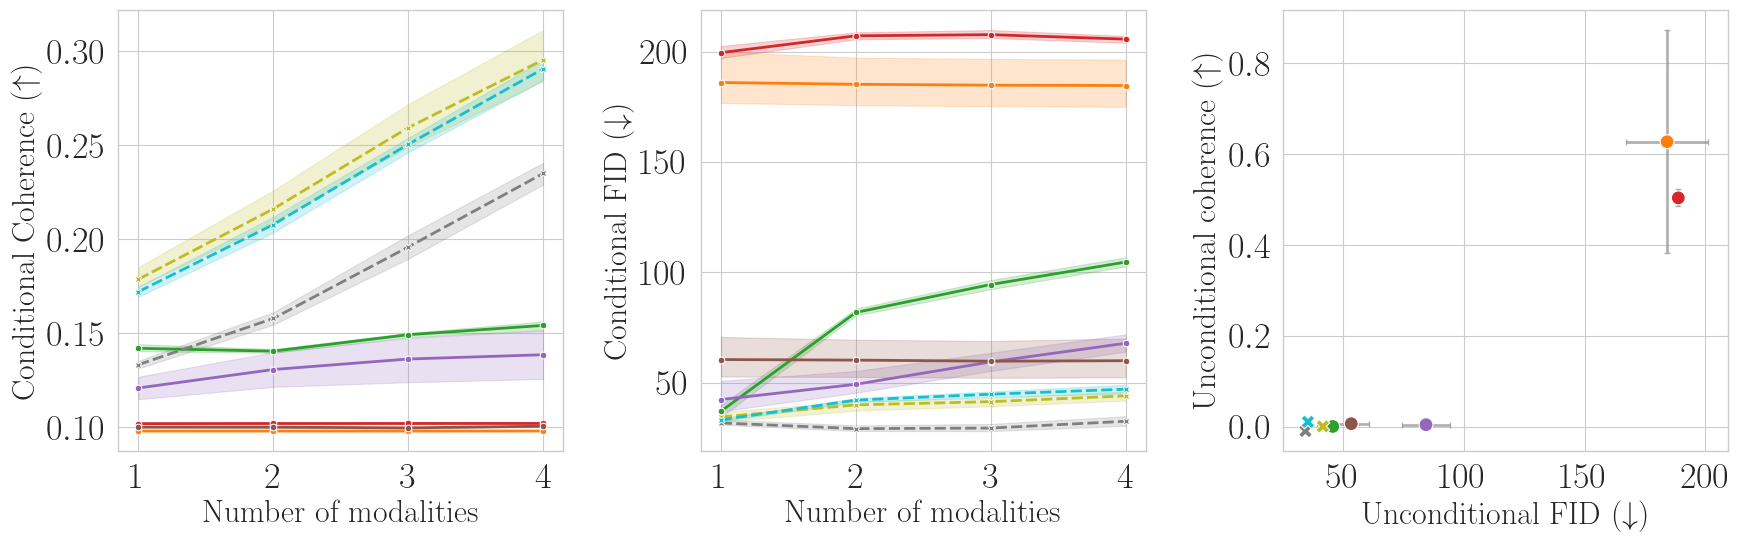

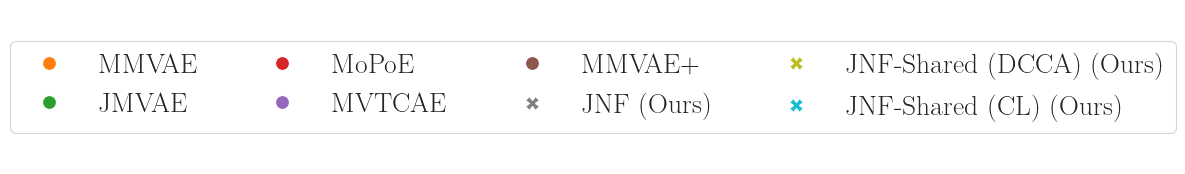

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style("whitegrid")
sb.set_context('paper')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 23,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 20,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)
fig, ax = plt.subplots(1,3, figsize=(18,6))

hue_order = ['MVAE',
             'MMVAE','JMVAE','MoPoE','MVTCAE','MMVAE+',
             'Nexus',
             'JNF (Ours)', 'JNF-Shared (DCCA) (Ours)','JNF-Shared (CL) (Ours)']

markers = {True : 'X',False : 'o'}

g = sb.lineplot(new_df, x='Number of modalities',y=r'Conditional Coherence $(\uparrow)$',hue='Model', hue_order=hue_order, 
               style='ours', markers=markers,ax=ax[0], linewidth=2)
g.legend().remove()

g = sb.lineplot(new_df, x='Number of modalities',y='Conditional FID $(\downarrow)$',hue='Model', hue_order=hue_order, 
               style='ours', markers=markers,ax=ax[1], legend='brief', linewidth=2)

handles, labels = g.get_legend_handles_labels()

new_handles = []
new_labels = []

for handle, label in zip(handles[1:-3], labels[1:-3]):
    if label != 'MVAE' and label != 'Nexus': 
        new_handles.append(handle)
        new_labels.append(label)
        if label == 'JNF (Ours)' or label=='JNF-Shared (CL) (Ours)'  or label=='JNF-Shared (DCCA) (Ours)':
            new_handles[-1].set_marker('X')

# create a legend only using the items

# g.legend(new_handles, new_labels,loc = 'lower left', bbox_to_anchor=(1,0))
g.legend().remove()




agg = raw_df.groupby(['Model'], as_index=True).agg({r'Unconditional FID $(\downarrow)$':['mean','std'], r'Unconditional coherence $(\uparrow)$':['mean','std'],'ours':['mean']} )

df2 = pd.DataFrame(agg.to_records())

df2.columns.values[1] = r'Unconditional FID $(\downarrow)$'
df2.columns.values[2] = 'xerr'
df2.columns.values[3] =r'Unconditional coherence $(\uparrow)$'
df2.columns.values[4] = 'yerr'
df2.columns.values[5] = 'ours'

df2[r'Unconditional coherence $(\uparrow)$'][df2['Model'] == 'JNF (Ours)'] -= 0.01 # slightly move to see all points
df2[r'Unconditional coherence $(\uparrow)$'][df2['Model'] == 'JNF-Shared (CL) (Ours)'] += 0.01 # slightly move to see all points


ax[2].errorbar(df2[r'Unconditional FID $(\downarrow)$'], df2[r'Unconditional coherence $(\uparrow)$'], xerr=df2['xerr'], yerr=df2['yerr'], fmt='o', color='grey', markersize=0, capsize=2, elinewidth=2, capthick=1, alpha=0.6)

g = sb.scatterplot(df2,x=r'Unconditional FID $(\downarrow)$', y=r'Unconditional coherence $(\uparrow)$',
                   hue='Model', hue_order=hue_order
                   , style='ours',
                   markers=markers, 
                   ax=ax[2],
                   s=100,
                   zorder=2
                   )

# g = sb.scatterplot(raw_df,x=r'Unconditional FID $(\downarrow)$', y=r'Unconditional coherence $(\uparrow)$',
#                    hue='Model', hue_order=hue_order
#                    , style='ours',
#                    markers=markers, 
#                    ax=ax[2],
#                    s=100
#                    )


handles, labels = g.get_legend_handles_labels()
g.legend().remove()

new_handles = []
new_labels = []

for handle, label in zip(handles[1:-3], labels[1:-3]):
    if label != 'MVAE' and label != 'Nexus': 
        new_handles.append(handle)
        new_labels.append(label)
        if label == 'JNF (Ours)' or label=='JNF-Shared (CL) (Ours)' or label=='JNF-Shared (DCCA) (Ours)':
            new_handles[-1].set_marker('X')

# create a legend only using the items
plt.tight_layout()

# lgd = fig.legend(new_handles, new_labels,loc='upper center',bbox_to_anchor=(0.5,0),ncol=4)

fig.savefig('translated_mmnist_results.pdf',bbox_inches='tight')
fig.savefig('translated_mmnist_results.png',bbox_inches='tight')

# Create a new figure for the legend
fig_legend = plt.figure(figsize=(2, 2))
ax = fig_legend.add_subplot(111)
fig_legend.legend(new_handles, new_labels,loc='center',ncol=4)
ax.axis('off')

# Save the legend
fig_legend.savefig('legend.pdf', bbox_inches='tight')

# Show plot
plt.show()



# Plots for coherence and FID for MHD (Conditional and Unconditional)

In [14]:
import pandas as pd

df = pd.read_csv('mhd_all_results.csv')
df['Model'] = df['model_config.name']

df['MFD'] = 0
for i in range(10):
    df['MFD'] = df['MFD'] + df[f'MFD_label_{i}']
    
df[r'Conditional MFD $(\downarrow)$'] = df['MFD']/10
df[r'Unconditional MFD $(\downarrow)$'] = (df['mean_fd_audio_prior'] + df['mean_fd_image_prior'] + df['mean_fd_trajectory_prior'])/3


agg = df.groupby('Model').agg({'joint_coherence_prior' : ['mean', 'std'], 
                         'mean_coherence_1' : ['mean', 'std'],
                         r'Unconditional MFD $(\downarrow)$':['mean','std'],
                         r'Conditional MFD $(\downarrow)$' : ['mean','std']})

agg.to_latex('tab_mhd.txt', float_format="%.2f")

In [9]:


df[r'Conditional coherence $(\uparrow)$'] = df['mean_coherence_1']

df['ours'] = (df['Model'] == 'JNF (Ours) ') + (df['Model'] == 'JNF-Shared (CL) (Ours)') + (df['Model'] == 'JNF-Shared (DCCA) (Ours)') 


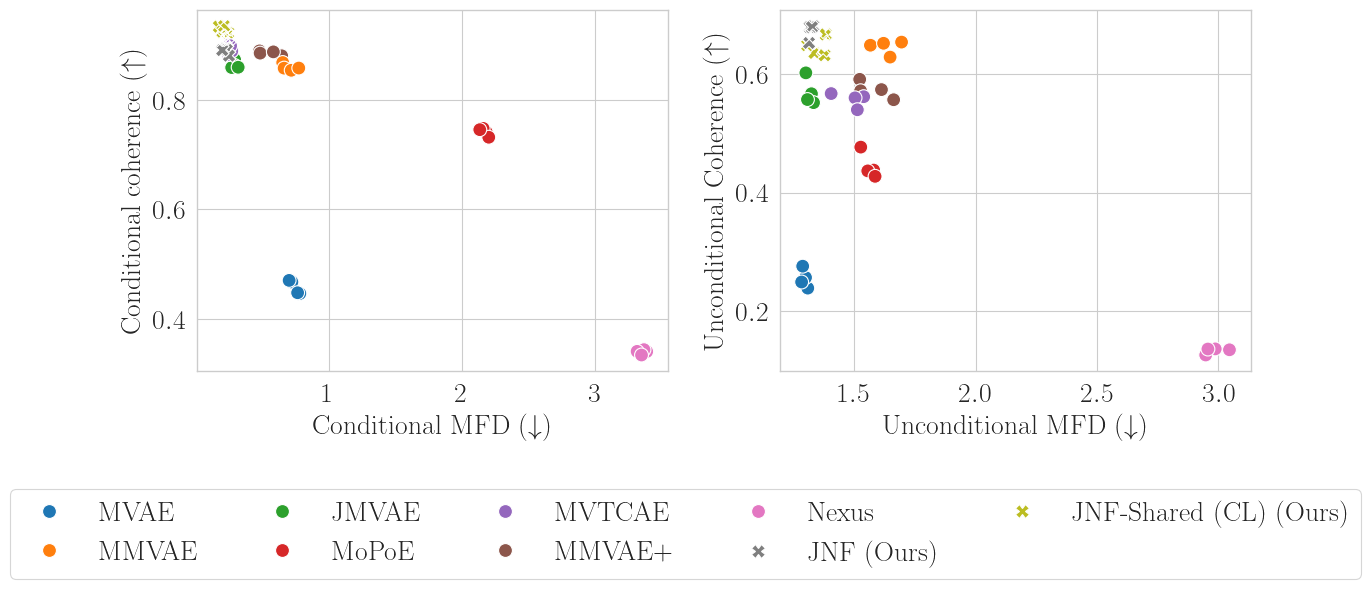

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
fig,axs = plt.subplots(1,2, figsize=(12,5))


font_size = 18
sb.set_context(context='paper')
sb.set_style("whitegrid")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 20,
    "font.size": 23,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20
}

hue_order = [
    'MVAE ',
            'MMVAE','JMVAE ','MoPoE ','MVTCAE','MMVAE+',
            'Nexus',
            'JNF (Ours) '
            # ,'JNF-Shared (DCCA) (Ours)'
            ,'JNF-Shared (CL) (Ours)'
            ]

markers = {True : 'X',False : 'o'}

plt.rcParams.update(tex_fonts)
plot = sb.scatterplot(df,x = r'Conditional MFD $(\downarrow)$', y=r'Conditional coherence $(\uparrow)$', hue='Model'
            , hue_order=hue_order,s=100, style='ours', markers=markers,ax=axs[0]
            )
plot.legend().remove()

df[r'Unconditional Coherence $(\uparrow)$'] = df['joint_coherence_prior']

df[r'Unconditional MFD $(\downarrow)$'] = (df['mean_fd_audio_prior'] + df['mean_fd_image_prior'] + df['mean_fd_trajectory_prior'])/3


markers = {True : 'X',False : 'o'}

plt.rcParams.update(tex_fonts)

plot = sb.scatterplot(df, x=r'Unconditional MFD $(\downarrow)$', y=r'Unconditional Coherence $(\uparrow)$', hue='Model',
                      style='ours', hue_order=hue_order, s=100, markers=markers, legend='brief', ax=axs[1])

# create a dictionary mapping the subscales to their color
handles, labels = plot.get_legend_handles_labels()
index_item_title = labels.index('Model')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

markers_dict = {'MVAE ': False, 'MMVAE': False, 'JMVAE ': False, 'MoPoE ': False, 'MVTCAE': False,
                 'MMVAE+': False, 'JNF (Ours) ': True, 'JNF-Shared (CL) (Ours)': True, 'Nexus':False,'JNF-Shared (DCCA) (Ours)': True}

# loop through the items, assign color via the subscale of the item idem
for handle, label in zip(handles[1:-3], labels[1:-3]):
    if markers_dict[label]: 
        handle.set_marker('X')
plot.legend().remove()

# create a legend only using the items
plt.tight_layout()

lgd = fig.legend(handles[1:-3], labels[1:-3],loc='upper center',bbox_to_anchor=(0.5, 0),ncol=5)

plt.show()

fig.savefig('mhd_combined.pdf',bbox_extra_artists=(lgd,),bbox_inches='tight')


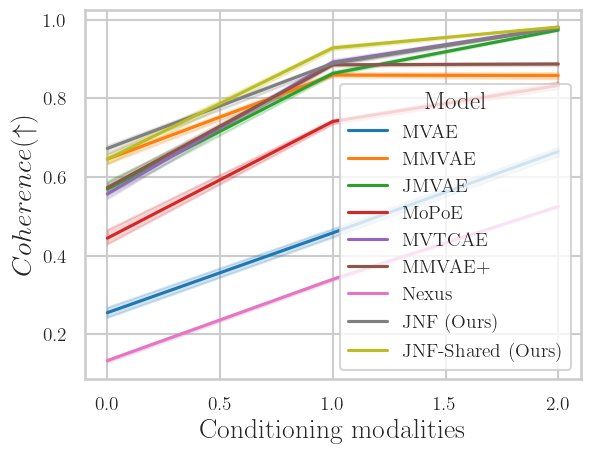

In [71]:
import pandas as pd

df = pd.read_csv('mhd_all_results.csv')
df['Model'] = df['model_config.name']


list_df = [None] * 3
for i in range(3):
    if i==0:
        
        list_df[i] = df[["Model",f"joint_coherence_prior"]]
        list_df[i] = list_df[i].rename(columns={f"joint_coherence_prior" : r"$Coherence (\uparrow)$" })
        list_df[i]["Conditioning modalities"] = i
    else :
        list_df[i] = df[["Model",f"mean_coherence_{i}"]]
        list_df[i] = list_df[i].rename(columns={f"mean_coherence_{i}" : r"$Coherence (\uparrow)$" })
        list_df[i]["Conditioning modalities"] = i
    
new_df = pd.concat(list_df).reset_index(drop=True)


font_size = 18
sb.set_context(context='talk', font_scale=1, rc=None)
sb.set_style("whitegrid")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 20,
    "font.size": 20,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}

hue_order = [
    'MVAE ',
            'MMVAE','JMVAE ','MoPoE ','MVTCAE','MMVAE+',
            'Nexus',
            'JNF (Ours) ','JNF-Shared (Ours)']

markers = {True : 'X',False : 'o'}

plt.rcParams.update(tex_fonts)
plot = sb.lineplot(new_df,x = 'Conditioning modalities', y=r"$Coherence (\uparrow)$", hue='Model'
            , hue_order=hue_order, markers=markers
            )


# Table for the results on MHD

# Coherences table for MNIST-SVHN

In [14]:
import pandas as pd

df = pd.read_csv('../tables_and_plots/ms_coherences.csv', sep=';')


df

Name  Runtime  joint_coherence_prior  \
0    silvery-snowball-301       47                 0.2745   
1          dainty-sea-300       54                 0.2341   
2      upbeat-terrain-299       45                 0.2475   
3         misty-water-290    10491                 0.1989   
4     stellar-pyramid-289    10151                 0.2215   
..                    ...      ...                    ...   
104        denim-shape-51     9096                 0.3221   
105          neat-dust-50     9083                 0.2728   
106       charmed-rain-46     9214                 0.3629   
107       stoic-donkey-45     9197                 0.3157   
108        breezy-tree-44     8923                 0.2474   

     modalities_specific_dim  seed model_config.name  training_config.seed  \
0                        NaN     3       JMVAEConfig                   NaN   
1                        NaN     3       JMVAEConfig                   NaN   
2                        NaN     3       JMVAEConfig                   NaN   
3                       20.0     3   MMVAEPlusConfig                   3.0   
4                       10.0     3   MMVAEPlusConfig                   3.0   
..                       ...   ...               ...                   ...   
104                      NaN     1       MoPoEConfig                   1.0   
105                      NaN     1       MoPoEConfig                   1.0   
106                      NaN     0       MoPoEConfig                   0.0   
107                      NaN     0       MoPoEConfig                   0.0   
108                      NaN     0       MoPoEConfig                   0.0   

     model_config.beta  custom_architectures  decoder_dist_params.mnist.scale  \
0                  2.5                   NaN                              NaN   
1                  1.0                   NaN                              NaN   
2                  0.5                   NaN                              NaN   
3                  0.5                   NaN                              NaN   
4                  0.5                   NaN                              NaN   
..                 ...                   ...                              ...   
104                1.0                   NaN                              NaN   
105                0.5                   NaN                              NaN   
106                2.5                   NaN                              NaN   
107                1.0                   NaN                              NaN   
108                0.5                   NaN                              NaN   

     ...  input_dims.mnist  input_dims.svhn  n_modalities  name  \
0    ...               NaN              NaN           NaN   NaN   
1    ...               NaN              NaN           NaN   NaN   
2    ...               NaN              NaN           NaN   NaN   
3    ...               NaN              NaN           NaN   NaN   
4    ...               NaN              NaN           NaN   NaN   
..   ...               ...              ...           ...   ...   
104  ...               NaN              NaN           NaN   NaN   
105  ...               NaN              NaN           NaN   NaN   
106  ...               NaN              NaN           NaN   NaN   
107  ...               NaN              NaN           NaN   NaN   
108  ...               NaN              NaN           NaN   NaN   

     uses_likelihood_rescaling  mnist_to_svhn  subset_to_mnist  \
0                          NaN       0.621895              NaN   
1                          NaN       0.635319              NaN   
2                          NaN       0.625299              NaN   
3                          NaN       0.393729              NaN   
4                          NaN       0.516228              NaN   
..                         ...            ...              ...   
104                        NaN       0.113700          0.73784   
105                        NaN       0.143080

In [16]:

mask = (df['model_config.name'] != 'MMVAEPlusConfig') + (df['modalities_specific_dim'] == 10)

df = df[mask]

df['mean'] = (df['joint_coherence_prior']+df['mnist_to_svhn'] + df['svhn_to_mnist'])/3
df['mean_cond'] = (df['mnist_to_svhn'] + df['svhn_to_mnist'])/2

agg = df.groupby(['model_config.name', 'model_config.beta'],as_index=True).agg({
    'joint_coherence_prior' : ['mean', 'std']
    ,
    'mnist_to_svhn' : ['mean', 'std'],
    'svhn_to_mnist' : ['mean','std'],
    'mean' : ['mean','std'],
    'mean_cond' :['mean','std']
})

agg

joint_coherence_prior            \
                                                     mean       std   
model_config.name model_config.beta                                   
JMVAEConfig       0.5                            0.267425  0.021871   
                  1.0                            0.344250  0.074679   
                  2.5                            0.430200  0.103999   
JNFConfig         0.5                            0.374050  0.006221   
                  1.0                            0.427200  0.010083   
                  2.5                            0.508775  0.010759   
JNFDccaConfig     0.5                            0.356475  0.018282   
                  1.0                            0.418540  0.017169   
                  2.5                            0.510050  0.005093   
JNFGMCConfig      0.5                            0.360900  0.028705   
                  1.0                            0.422350  0.012053   
                  2.5                            0.505500  0.017801   
MMVAEConfig       0.5                            0.353875  0.017068   
                  1.0                            0.350875  0.020636   
                  2.5                            0.334250  0.009995   
MMVAEPlusConfig   0.5                            0.243850  0.038537   
                  1.0                            0.267175  0.033507   
                  2.5                            0.434125  0.047204   
MVTCAEConfig      0.5                            0.292700  0.005193   
                  1.0                            0.353675  0.019627   
                  2.5                            0.444725  0.015217   
MoPoEConfig       0.5                            0.271375  0.016923   
                  1.0                            0.316975  0.011116   
                  2.5                            0.359275  0.007389   

                                    mnist_to_svhn           svhn_to_mnist  \
                                             mean       std          mean   
model_config.name model_config.beta                                         
JMVAEConfig       0.5                    0.669335  0.033022      0.567450   
                  1.0                    0.694248  0.053756      0.541438   
                  2.5                    0.732738  0.074003      0.526768   
JNFConfig         0.5                    0.803865  0.006984      0.467270   
                  1.0                    0.809775  0.009735      0.478275   
                  2.5                    0.816900  0.008122      0.518975   
JNFDccaConfig     0.5                    0.757100  0.006116      0.710825   
                  1.0                    0.759426  0.007221      0.705959   
                  2.5                    0.761580  0.011355      0.697035   
JNFGMCConfig      0.5                    0.783736  0.017330      0.789203   
                  1.0                    0.805755  0.005183      0.776042   
                  2.5                    0.810097  0.005780      0.745937   
MMVAEConfig       0.5                    0.800965  0.011654      0.700934   
                  1.0                    0.798590  0.020199      0.679841   
                  2.5                    0.802256  0.016793      0.684418   
MMVAEPlusConfig   0.5                    0.549306  0.041014      0.621585   
                  1.0                    0.497527  0.028956      0.586530   
                  2.5                    0.602890  0.094598      0.582068   
MVTCAEConfig      0.5                    0.744521  0.019471      0.358361   
                  1.0                    0.749400  0.050063      0.437350   
                  2.5                    0.810885  0.007010      0.518685   
MoPoEConfig       0.5                    0.127515  0.011721      0.768505   
                  1.0                    0.116545  0.002611      0.752005   
                  2.5                    0.118530  0.001721      0.724010   

                                      

In [29]:
agg.to_latex('tab_mnist_svhn.txt', float_format="%.2f")

In [30]:
agg

joint_coherence_prior            \
                                                     mean       std   
model_config.name model_config.beta                                   
JMVAEConfig       0.5                            0.267425  0.021871   
                  1.0                            0.344250  0.074679   
                  2.5                            0.430200  0.103999   
JNFConfig         0.5                            0.374050  0.006221   
                  1.0                            0.427200  0.010083   
                  2.5                            0.508775  0.010759   
JNFDccaConfig     0.5                            0.356475  0.018282   
                  1.0                            0.418540  0.017169   
                  2.5                            0.510050  0.005093   
JNFGMCConfig      0.5                            0.360900  0.028705   
                  1.0                            0.422350  0.012053   
                  2.5                            0.505500  0.017801   
MMVAEConfig       0.5                            0.353875  0.017068   
                  1.0                            0.350875  0.020636   
                  2.5                            0.334250  0.009995   
MMVAEPlusConfig   0.5                            0.243850  0.038537   
                  1.0                            0.267175  0.033507   
                  2.5                            0.434125  0.047204   
MVTCAEConfig      0.5                            0.292700  0.005193   
                  1.0                            0.353675  0.019627   
                  2.5                            0.444725  0.015217   
MoPoEConfig       0.5                            0.271375  0.016923   
                  1.0                            0.316975  0.011116   
                  2.5                            0.359275  0.007389   

                                    mnist_to_svhn           svhn_to_mnist  \
                                             mean       std          mean   
model_config.name model_config.beta                                         
JMVAEConfig       0.5                    0.669335  0.033022      0.567450   
                  1.0                    0.694248  0.053756      0.541438   
                  2.5                    0.732738  0.074003      0.526768   
JNFConfig         0.5                    0.803865  0.006984      0.467270   
                  1.0                    0.809775  0.009735      0.478275   
                  2.5                    0.816900  0.008122      0.518975   
JNFDccaConfig     0.5                    0.757100  0.006116      0.710825   
                  1.0                    0.759426  0.007221      0.705959   
                  2.5                    0.761580  0.011355      0.697035   
JNFGMCConfig      0.5                    0.783736  0.017330      0.789203   
                  1.0                    0.805755  0.005183      0.776042   
                  2.5                    0.810097  0.005780      0.745937   
MMVAEConfig       0.5                    0.800965  0.011654      0.700934   
                  1.0                    0.798590  0.020199      0.679841   
                  2.5                    0.802256  0.016793      0.684418   
MMVAEPlusConfig   0.5                    0.549306  0.041014      0.621585   
                  1.0                    0.497527  0.028956      0.586530   
                  2.5                    0.602890  0.094598      0.582068   
MVTCAEConfig      0.5                    0.744521  0.019471      0.358361   
                  1.0                    0.749400  0.050063      0.437350   
                  2.5                    0.810885  0.007010      0.518685   
MoPoEConfig       0.5                    0.127515  0.011721      0.768505   
                  1.0                    0.116545  0.002611      0.752005   
                  2.5                    0.118530  0.001721      0.724010   

                                      

## All results table for MHD

In [2]:
import pandas as pd

df = pd.read_csv('mhd_ablation.csv')

df.rename(columns={'model_.name':'Model',
                   'model_.beta':'beta',
                   'joint_coherence_prior' : 'Joint',
                   'mean_coherence_1':'Conditional'},inplace=True)

df['average'] = (df['Conditional'] + df['Joint'])/2

agg = df.groupby(['Model','beta']).agg({
        'Joint' : ['mean','std'],
        'Conditional' : ['mean', 'std'],
        # 'average' : ['mean','std']}
                                       )

agg.to_latex('tab_mhd_ablation.txt', float_format="%.2f")

agg

Joint           Conditional             average          
                    mean       std        mean       std      mean       std
Model     beta                                                              
JMVAE     0.5   0.569300  0.022606    0.863533  0.006629  0.716417  0.011116
          1.0   0.146775  0.020466    0.790679  0.012484  0.468727  0.012989
          2.5   0.152050  0.036881    0.747233  0.015712  0.449642  0.024240
JNF       0.5   0.672675  0.013542    0.889137  0.005972  0.780906  0.007040
          1.0   0.712075  0.018364    0.864829  0.013859  0.788452  0.014202
          2.5   0.724275  0.023590    0.808354  0.006817  0.766315  0.009132
MMVAE     0.5   0.645650  0.011640    0.859342  0.006042  0.752496  0.007701
          1.0   0.603350  0.071661    0.842162  0.035951  0.722756  0.053793
          2.5   0.647275  0.021629    0.861179  0.009487  0.754227  0.012503
MMVAEPlus 0.5   0.576775  0.034660    0.885358  0.017013  0.731067  0.025825
          1.0   0.643525  0.046794    0.822600  0.025056  0.733062  0.035835
          2.5   0.473400  0.154028    0.496942  0.076660  0.485171  0.112933
MVTCAE    0.5   0.557050  0.011961    0.892279  0.008096  0.724665  0.004322
          1.0   0.590925  0.010485    0.871133  0.004207  0.731029  0.006224
          2.5   0.582667  0.016487    0.802822  0.011062  0.692744  0.013533
MoPoE     0.5   0.444675  0.021862    0.741367  0.007156  0.593021  0.012999
          1.0   0.498025  0.009946    0.723596  0.016101  0.610810  0.012751
          2.5   0.450650  0.018894    0.618783  0.010483  0.534717  0.014352

Il manque MVTCAE et MMVAE (runs lancés)

# Ablation beta Translated MMNIST

In [43]:
import pandas as pd

df = pd.read_csv('../tables_and_plots/translated_mmnist_results.csv')
df.rename(columns={'model_config.name':'Model',
                   'model_config.beta':'beta'},inplace=True)

df['mean_coherence'] = (df['mean_coherence_1'] + df['mean_coherence_2'] + df['mean_coherence_3'] + df['mean_coherence_4'] )/4

agg = df.groupby(['Model','beta']).agg({
        'joint_coherence_prior' : ['mean'],
        'mean_coherence' : ['mean'],
        'Mean FD from 1 modalities to m0' : ['mean']})

agg.to_latex('tab_translated_mmnist.txt', float_format="%.2f")

agg

joint_coherence_prior mean_coherence  \
                                               mean           mean   
Model                    beta                                        
JMVAE                    0.5               0.000325       0.146486   
                         1.0               0.000700       0.142247   
                         2.5               0.003100       0.122692   
JNF (Ours)               0.5               0.000400       0.161429   
                         1.0               0.000700       0.171048   
                         2.5               0.063350       0.124463   
JNF-Shared (CL) (Ours)   0.5               0.000475       0.230289   
                         1.0               0.000800       0.199484   
                         2.5               0.060300       0.134184   
JNF-Shared (DCCA) (Ours) 0.5               0.000550       0.237437   
MMVAE                    0.5               0.627575       0.100011   
                         1.0               0.488300       0.100013   
                         2.5               0.583500       0.100019   
MMVAE+                   0.5               0.006425       0.100110   
                         1.0               0.005200       0.100170   
                         2.5               0.147200       0.099830   
MVTCAE                   0.5               0.004200       0.131640   
                         1.0               0.084025       0.112949   
                         2.5               0.225825       0.107154   
MoPoE                    0.5               0.258233       0.100046   
                         1.0               0.503875       0.100017   
                         2.5               0.539100       0.100052   

                              Mean FD from 1 modalities to m0  
                                                         mean  
Model                    beta                                  
JMVAE                    0.5                        37.058778  
                         1.0                        43.925072  
                         2.5                        55.091538  
JNF (Ours)               0.5                        30.908898  
                         1.0                        33.816854  
                         2.5                       218.752812  
JNF-Shared (CL) (Ours)   0.5                        33.171273  
                         1.0                        35.297653  
                         2.5                       217.020430  
JNF-Shared (DCCA) (Ours) 0.5                        34.493076  
MMVAE                    0.5                       185.965301  
                         1.0                       172.438768  
                         2.5                       181.084887  
MMVAE+                   0.5                        60.483763  
                         1.0                        69.795281  
                         2.5                       206.129001  
MVTCAE                   0.5                        42.353153  
                         1.0                       121.860039  
                         2.5                       178.489888  
MoPoE                    0.5                       195.527661  
                         1.0                       199.481833  
                         2.5                       199.943024

Il manque JMVAE (runs lancés) et MMVAE et MoPoE si je les rajoute (runs lancés aussi)

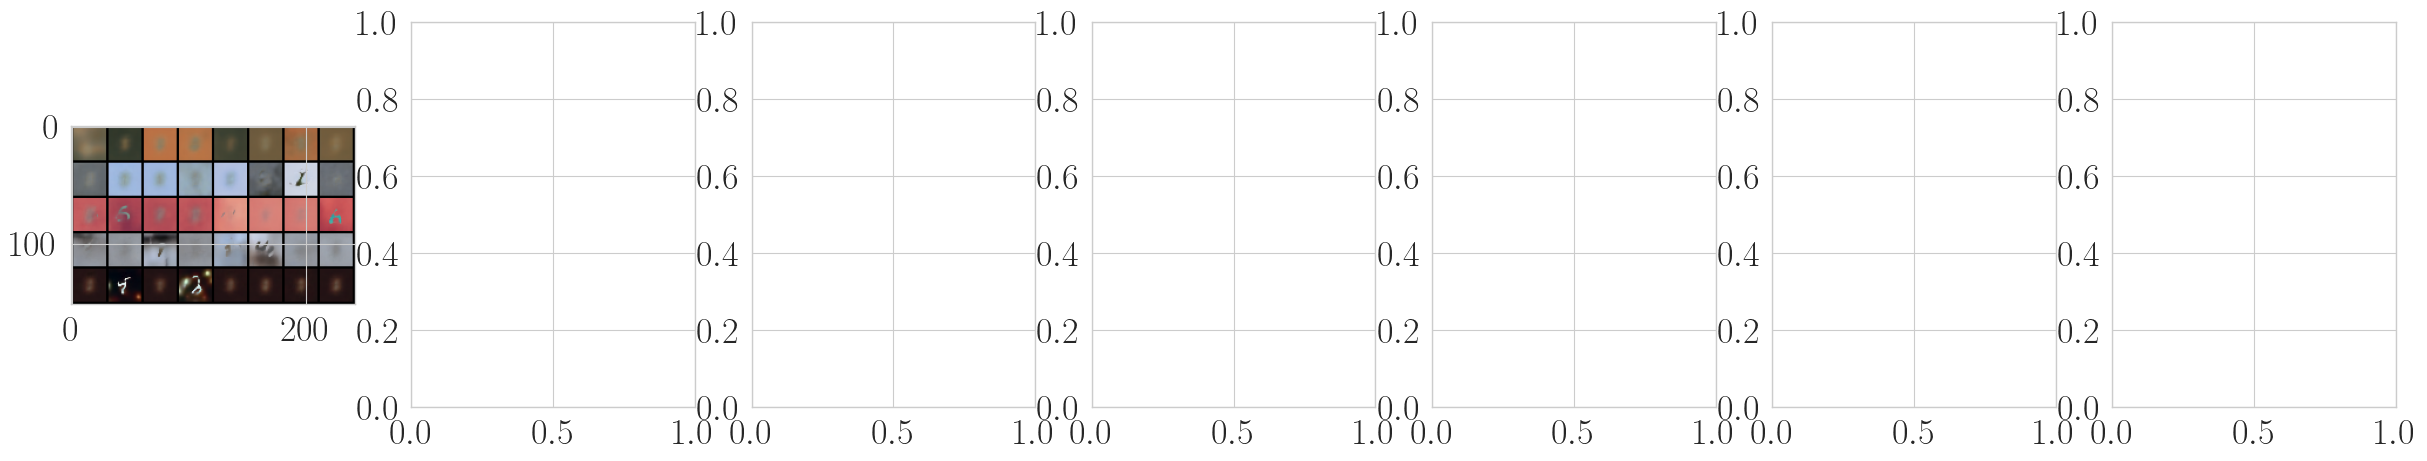